In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lzma,json

In [3]:
f=lzma.open("ep/ep_meps_current.json.xz")
#http://parltrack.euwiki.org/dumps/ep_meps_current.json.xz
members=json.loads(f.read())

In [4]:
f=lzma.open("ep/ep_votes.json.xz")
#http://parltrack.euwiki.org/dumps/ep_votes.json.xz
votes=json.loads(f.read())

In [5]:
countries=['Hungary','Romania']
eu={}
parties={}
groups={}
for j in members:
    z='Constituencies'
    w='Groups'    
    if z in j:
        if j[z][0]['country'] in countries:
            if j[z][0]['country'] not in eu:eu[j[z][0]['country']]={}
            eu[j[z][0]['country']][j['UserID']]=j
            for i in j[z]:
                if type(i['party'])!=list:
                    party=i['party']
                else:
                    party=i['party'][0]
                start=int(str(i['start'])[:4])
                end=int(str(i['end'])[:4])
                if end==9999:
                    end=2019
                if party not in parties:
                    parties[party]={'min':9999,'max':0}
                parties[party]['min']=min(start,parties[party]['min'])
                parties[party]['max']=max(end,parties[party]['max'])
            if w in j:
                for i in j[w]:
                    party=i['Organization']
                    if type(i['groupid'])!=list:
                        code=i['groupid']
                    else:
                        code=i['groupid'][0]
                    start=int(str(i['start'])[:4])
                    end=int(str(i['end'])[:4])
                    if end==9999:
                        end=2019
                    if party not in groups:
                        groups[party]={'min':9999,'max':0}
                    groups[party]['min']=min(start,groups[party]['min'])
                    groups[party]['max']=max(end,groups[party]['max'])
                    groups[party]['code']=code

In [6]:
groups

{"Group of the European People's Party (Christian Democrats)": {'min': 2009,
  'max': 2019,
  'code': 'PPE'},
 'Non-attached Members': {'min': 2005, 'max': 2019, 'code': 'NA'},
 "Group of the European People's Party (Christian Democrats) and European Democrats": {'min': 2003,
  'max': 2009,
  'code': 'PPE-DE'},
 'Group of the Alliance of Liberals and Democrats for Europe': {'min': 2004,
  'max': 2019,
  'code': 'ALDE'},
 'European Conservatives and Reformists Group': {'min': 2009,
  'max': 2019,
  'code': 'ECR'},
 'Group of the Progressive Alliance of Socialists and Democrats in the European Parliament': {'min': 2009,
  'max': 2019,
  'code': 'S&D'},
 'Socialist Group in the European Parliament': {'min': 2004,
  'max': 2009,
  'code': 'PSE'},
 'Group of the Party of European Socialists': {'min': 2003,
  'max': 2004,
  'code': 'PSE'},
 'Identity, Tradition and Sovereignty Group': {'min': 2007,
  'max': 2007,
  'code': 'ITS'},
 'Group of the European Liberal, Democrat and Reform Party': 

In [7]:
parties

{'Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt': {'min': 2009,
  'max': 2014},
 'Partidul Democrat-Liberal': {'min': 2008, 'max': 2015},
 'Partidul România Mare': {'min': 2007, 'max': 2014},
 'Partidul Democrat': {'min': 2007, 'max': 2008},
 'Fidesz-Magyar Polgári Szövetség': {'min': 2004, 'max': 2009},
 'Partidul Naţional Liberal': {'min': 2007, 'max': 2019},
 'Partidul Naţional Ţaranesc Creştin Democrat': {'min': 2014, 'max': 2014},
 'Modern Magyarország Mozgalom': {'min': 2013, 'max': 2014},
 'Magyar Demokrata Fórum': {'min': 2004, 'max': 2013},
 'Magyar Szocialista Párt': {'min': 2004, 'max': 2019},
 'Szabad Demokraták Szövetsége': {'min': 2004, 'max': 2009},
 'Partidul Social Democrat': {'min': 2007, 'max': 2019},
 'Jobbik Magyarországért Mozgalom': {'min': 2009, 'max': 2019},
 'Partidul Liberal Democrat': {'min': 2007, 'max': 2008},
 'Uniunea Democrată Maghiară din România': {'min': 2007, 'max': 2019},
 'Partidul Conservator': {'min': 2007, 'max': 2015},
 '-': {'m

In [8]:
def party_normalizer(party):
    if party in ['ALDE','ELDR']: return 'ALDE'
    if party in ['ITS','ENF']: return 'ENF'
    if party in ['NA','NI']: return 'N/A'
    if party in ['PPE','PPE-DE']: return  'PPE'
    if party in ['S&D','PSE']: return 'S&D'
    if party in ['-','Independent']: return 'N/A'
    if party in ['ALDE Romania','Partidul Conservator','Partidul Puterii Umaniste']: return 'ALDE RO'
    if party in ['Demokratikus Koalíció']: return 'DK'
    if party in ['Együtt 2014 - Párbeszéd Magyarországért']:return 'Együtt PM'
    if party in ['Fidesz-Magyar Polgári Szövetség',
        'Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt',
        'Fidesz-Magyar Polgári Szövetség-Kereszténydemokrata Néppárt',
        'Kereszténydemokrata Néppárt']:return 'FIDESZ-KDNP'
    if party in ['Forumul Democrat al Germanitor din România']: return 'FDGR'
    if party in ['Jobbik Magyarországért Mozgalom']:return 'Jobbik'
    if party in ['Lehet Más A Politika']:return 'LMP'
    if party in ['Magyar Demokrata Fórum','Modern Magyarország Mozgalom',
                'Szabad Demokraták Szövetsége']: return 'Egyéb'
    if party in ['Magyar Szocialista Párt']: return 'MSZP'
    if party in ['Partidul Democrat','Partidul Democrat-Liberal','Partidul Naţional Liberal',
        'Partidul Liberal Democrat','PNL']: return'PNL'
    if party in ['Partidul Mișcarea Populară']: return 'PMP'
    if party in ['Partidul Naţional Ţaranesc Creştin Democra']:return 'PNȚCD',
    if party in ['Partidul România Mare']:return 'PRM',
    if party in ['Partidul Social Democrat','Partidul Social Democrat + Partidul Conservator']:return 'PSD'
    if party in ['Romániai Magyar Demokrata Szövetség',
        'Uniunea Democrată Maghiară din România']:return 'UDMR'
    if party in ['Uniunea Națională pentru Progresul României']: return 'UNPR'
    else: return party

In [9]:
def get_allegiance(allegiance,voteid,outcome,name):
    if voteid not in allegiance:
        allegiance[voteid]={'title':j['title'],'url':j['url'],'ts':j['ts']}
    if outcome not in allegiance[voteid]:
        allegiance[voteid][outcome]=[]
    allegiance[voteid][outcome].append(name)
    return allegiance

In [10]:
eu_allegiance={}
eu_vt={}
for country in countries:
    hu=eu[country]
    hu_allegiance={}
    hu_vt={}
    for j in votes:
        ts=j['ts']
        year=str(ts)[:4]
        if year not in hu_vt:hu_vt[year]=[]
        if year not in hu_allegiance:hu_allegiance[year]={'name':{},'group':{},'party':{}}    
        if j['title'] not in ["Modification de l'ordre du jour"]:
            for outcome in ['Abstain','For','Against']:
                if outcome in j:
                    for group in j[outcome]['groups']:
                        for i in group['votes']:
                            if i['ep_id'] in hu:
                                dummy={}
                                dummy['vote']=j['voteid']
                                dummy['party']='-'
                                for k in hu[i['ep_id']]['Constituencies']:
                                    if k['start']<ts<k['end']:
                                        dummy['party']=k['party']
                                dummy['party']=party_normalizer(dummy['party'])
                                dummy['name']=hu[i['ep_id']]['Name']['full']
                                dummy['outcome']=outcome
                                dummy['group']=group['group']
                                dummy['group']=party_normalizer(dummy['group'])
                                dummy['title']=j['title']
                                dummy['url']=j['url']
                                dummy['ts']=ts
                                dummy['year']=year
                                hu_vt[year].append(dummy)
                                for allegiance_type in ['name','group','party']:
                                    hu_allegiance[year][allegiance_type]=\
                                        get_allegiance(hu_allegiance[year][allegiance_type],j['voteid'],
                                                   outcome,dummy[allegiance_type])
    eu_allegiance[country]=hu_allegiance
    eu_vt[country]=hu_vt
    print(country)

Hungary
Romania


In [11]:
for country in countries:
    for year in eu_vt[country]:
        hu_df=pd.DataFrame(eu_vt[country][year])
        #hu_df.to_json("ep/export/pandas/"+country+'_'+year+".json.gz", compression="gzip")
        #open('ep/hu_vt.json','w').write(json.dumps(hu_vt))
        print(country,year),

Hungary 2015
Hungary 2004
Hungary 2005
Hungary 2006
Hungary 2007
Hungary 2016
Hungary 2011
Hungary 2017
Hungary 2008
Hungary 2009
Hungary 2010
Hungary 2012
Hungary 2013
Hungary 2014
Hungary 2018
Hungary 2019
Romania 2015
Romania 2004
Romania 2005
Romania 2006
Romania 2007
Romania 2016
Romania 2011
Romania 2017
Romania 2008
Romania 2009
Romania 2010
Romania 2012
Romania 2013
Romania 2014
Romania 2018
Romania 2019


Allegiance

In [12]:
def get_allegiance_matrix(key,vt,allegiance,abstains=False,abstain_type='Opposite'):
    allegiance_matrix={}
    for j1 in vt:
        outcome=j1['outcome']
        name1=party_normalizer(j1[key])
        if name1 not in allegiance_matrix:allegiance_matrix[name1]={}
        if outcome=='For':
            for name2i in allegiance[j1['vote']]['For']:
                name2=party_normalizer(name2i)
                if name2 not in allegiance_matrix[name1]:
                    allegiance_matrix[name1][name2]={'Same':0,'Opposite':0,'Total':0}
                allegiance_matrix[name1][name2]['Total']+=1
                allegiance_matrix[name1][name2]['Same']+=1
            if 'Against' in allegiance[j1['vote']]:
                for name2 in allegiance[j1['vote']]['Against']:
                    if name2 not in allegiance_matrix[name1]:
                        allegiance_matrix[name1][name2]={'Same':0,'Opposite':0,'Total':0}
                    allegiance_matrix[name1][name2]['Total']+=1
                    allegiance_matrix[name1][name2]['Opposite']+=1
            if abstains:
                if 'Abstain' in allegiance[j1['vote']]:
                    for name2 in allegiance[j1['vote']]['Abstain']:
                        if name2 not in allegiance_matrix[name1]:
                            allegiance_matrix[name1][name2]={'Same':0,'Opposite':0,'Total':0}
                        allegiance_matrix[name1][name2]['Total']+=1
                        allegiance_matrix[name1][name2][abstain_type]+=1
        elif outcome=='Against':
            for name2 in allegiance[j1['vote']]['Against']:
                if name2 not in allegiance_matrix[name1]:
                    allegiance_matrix[name1][name2]={'Same':0,'Opposite':0,'Total':0}
                allegiance_matrix[name1][name2]['Total']+=1
                allegiance_matrix[name1][name2]['Same']+=1
            if 'For' in allegiance[j1['vote']]:
                for name2 in allegiance[j1['vote']]['For']:
                    if name2 not in allegiance_matrix[name1]:
                        allegiance_matrix[name1][name2]={'Same':0,'Opposite':0,'Total':0}
                    allegiance_matrix[name1][name2]['Total']+=1
                    allegiance_matrix[name1][name2]['Opposite']+=1
            if abstains:
                if 'Abstain' in allegiance[j1['vote']]:
                    for name2i in allegiance[j1['vote']]['Abstain']:
                        name2=party_normalizer(name2i)
                        if name2 not in allegiance_matrix[name1]:
                            allegiance_matrix[name1][name2]={'Same':0,'Opposite':0,'Total':0}
                        allegiance_matrix[name1][name2]['Total']+=1
                        allegiance_matrix[name1][name2][abstain_type]+=1
    for j in allegiance_matrix:
        for i in allegiance_matrix[j]:
            allegiance_matrix[j][i]['Same_perc']=np.round(allegiance_matrix[j][i]['Same']/allegiance_matrix[j][i]['Total'],3)
            allegiance_matrix[j][i]['Opposite_perc']=np.round(allegiance_matrix[j][i]['Opposite']/allegiance_matrix[j][i]['Total'],3)
    return allegiance_matrix

In [16]:
eu_allegiance_matrix={}
abstains=False #count abstains
abstain_type='Opposite' # Opposite or Same
for country in countries:
    for year in sorted(eu_vt[country]):
        for allegiance_type1 in ['name','group','party']:
            for allegiance_type2 in ['name','group','party']:
                dummy=get_allegiance_matrix(allegiance_type1,eu_vt[country][year],
                        eu_allegiance[country][year][allegiance_type2],abstains,abstain_type)
                if dummy!={}:
                    if country not in eu_allegiance_matrix:eu_allegiance_matrix[country]={}
                    if year not in eu_allegiance_matrix[country]:eu_allegiance_matrix[country][year]={}
                    if allegiance_type1 not in eu_allegiance_matrix[country][year]:
                        eu_allegiance_matrix[country][year][allegiance_type1]={}
                    if allegiance_type2 not in eu_allegiance_matrix[country][year][allegiance_type1]:
                        eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]={}

                    eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]=\
                        dummy

        print(country,year)

Hungary 2004
Hungary 2005
Hungary 2006
Hungary 2007
Hungary 2008
Hungary 2009
Hungary 2010
Hungary 2011
Hungary 2012
Hungary 2013
Hungary 2014
Hungary 2015
Hungary 2016
Hungary 2017
Hungary 2018
Hungary 2019
Romania 2004
Romania 2005
Romania 2006
Romania 2007
Romania 2008
Romania 2009
Romania 2010
Romania 2011
Romania 2012
Romania 2013
Romania 2014
Romania 2015
Romania 2016
Romania 2017
Romania 2018
Romania 2019


Stringify keys

In [23]:
def strinfigy_keys(mydict):
    for key in mydict.keys():
        if type(key) is not str:
            try:
                mydict[str(key)] = mydict[key]
            except:
                try:
                    mydict[repr(key)] = mydict[key]
                except:
                    pass
    del mydict[key]
    return mydict

In [20]:
eu_allegiance_matrix=strinfigy_keys(eu_allegiance_matrix)
for country in eu_allegiance_matrix:
    eu_allegiance_matrix[country]=strinfigy_keys(eu_allegiance_matrix[country])
    for year in eu_allegiance_matrix[country]:
        eu_allegiance_matrix[country]=strinfigy_keys(eu_allegiance_matrix[country])
    

SyntaxError: unexpected EOF while parsing (<ipython-input-20-be6811af38a7>, line 2)

In [33]:
for country in eu_allegiance_matrix:
                            if type(country) is not str:
                                print(country)

In [25]:
eu_allegiance_matrix['Hungary']['2018']['name']['group']['György SCHÖPFLIN']

{'PPE': {'Same': 61597,
  'Opposite': 742,
  'Total': 62339,
  'Same_perc': 0.9880973387446061,
  'Opposite_perc': 0.011902661255393895},
 'S&D': {'Same': 13721,
  'Opposite': 5923,
  'Total': 19644,
  'Same_perc': 0.6984829973528813,
  'Opposite_perc': 0.3015170026471187},
 'N/A': {'Same': 4384,
  'Opposite': 4843,
  'Total': 9227,
  'Same_perc': 0.47512734366533,
  'Opposite_perc': 0.52487265633467},
 'Verts/ALE': {'Same': 4940,
  'Opposite': 4799,
  'Total': 9739,
  'Same_perc': 0.5072389362357531,
  'Opposite_perc': 0.49276106376424683}}

In [19]:
open('ep/eu_allegiance_matrix.json','w').write(json.dumps(eu_allegiance_matrix))

TypeError: keys must be a string

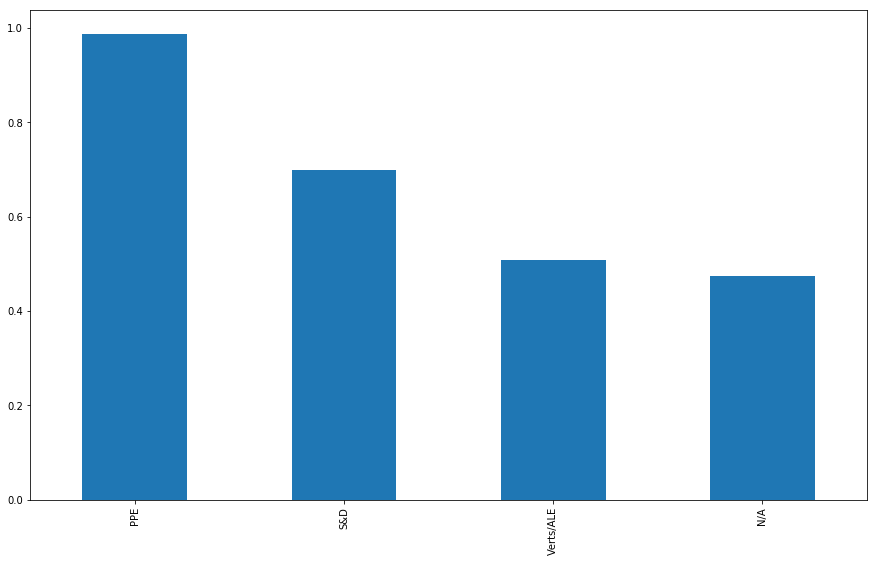

In [240]:
(pd.DataFrame(eu_allegiance_matrix['Hungary']['2018']['name']['group']['György SCHÖPFLIN']).\
         T['Same_perc']-0).sort_values(ascending=False).plot(kind='bar',figsize=(15,9))

In [241]:
sorted(eu_allegiance_matrix['Romania'][year]['name']['party'])

['Adina-Ioana VĂLEAN',
 'Andi CRISTEA',
 'Claudia ȚAPARDEL',
 'Claudiu Ciprian TĂNĂSESCU',
 'Cristian Dan PREDA',
 'Cristian-Silviu BUŞOI',
 'Csaba SÓGOR',
 'Cătălin Sorin IVAN',
 'Daciana Octavia SÂRBU',
 'Damian DRĂGHICI',
 'Dan NICA',
 'Daniel BUDA',
 'Doru-Claudian FRUNZULICĂ',
 'Emilian PAVEL',
 'Ioan Mircea PAŞCU',
 'Iuliu WINKLER',
 'Laurenţiu REBEGA',
 'Maria GRAPINI',
 'Maria Gabriela ZOANĂ',
 'Marian-Jean MARINESCU',
 'Mihai ŢURCANU',
 'Mircea DIACONU',
 'Monica MACOVEI',
 'Norica NICOLAI',
 'Ramona Nicole MĂNESCU',
 'Renate WEBER',
 'Răzvan POPA',
 'Siegfried MUREŞAN',
 'Sorin MOISĂ',
 'Theodor Dumitru STOLOJAN',
 'Traian UNGUREANU',
 'Victor BOŞTINARU']

In [ ]:
for year in sorted(eu_allegiance_matrix['Romania']):
    try:
        print('drawing',year)
        fig,ax=plt.subplots(1,1,figsize=(15,9))
        (pd.DataFrame(eu_allegiance_matrix['Romania'][year]['party']['group']['UDMR']).\
             T['Same_perc']-0).sort_values(ascending=False).plot(kind='bar',ax=ax)
    except:
        print('no data',year)

Clusterings

In [243]:
from scipy.cluster.hierarchy import dendrogram, linkage  
import numpy as np

In [244]:
def dict_2_matrix(matrix,key):
    labels=sorted(matrix)
    #extend to square matrix
    inner_keys=matrix[sorted(matrix)[0]]
    inner_keys=sorted(inner_keys[sorted(inner_keys)[0]])
    for name1 in  labels:
        for name2 in labels:
            if name2 not in matrix[name1]:
                matrix[name1][name2]={i:0 for i in inner_keys}
    return np.array([[matrix[name1][name2][key] for name2 in sorted(matrix[name1])] for name1 in labels]),labels

In [267]:
def dendro(matrix,key='Same_perc'):
    X,labelList=dict_2_matrix(matrix,key)
    linked = linkage(X, 'average')
    plt.figure(figsize=(14, 7))  
    dendrogram(linked,  
                orientation='right',
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True,
                color_threshold=0.5 )
    ax=plt.gca()
    plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
    plt.show()  

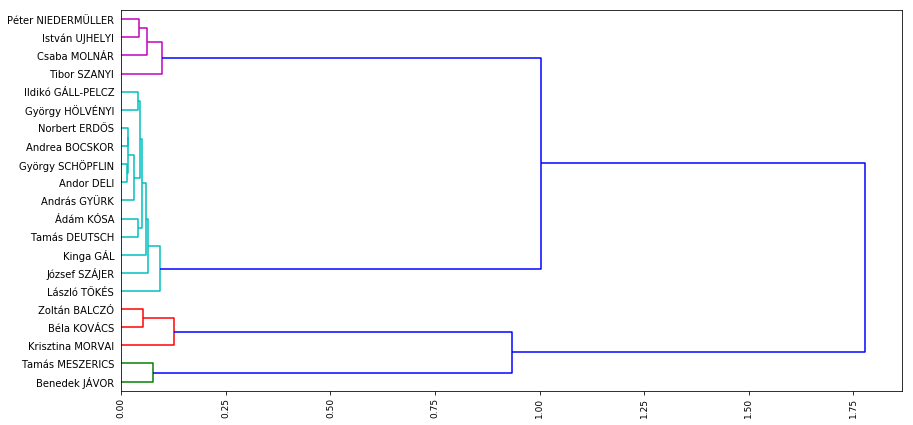

In [275]:
dendro(eu_allegiance_matrix['Hungary']['2016']['name']['name'],'Same_perc')

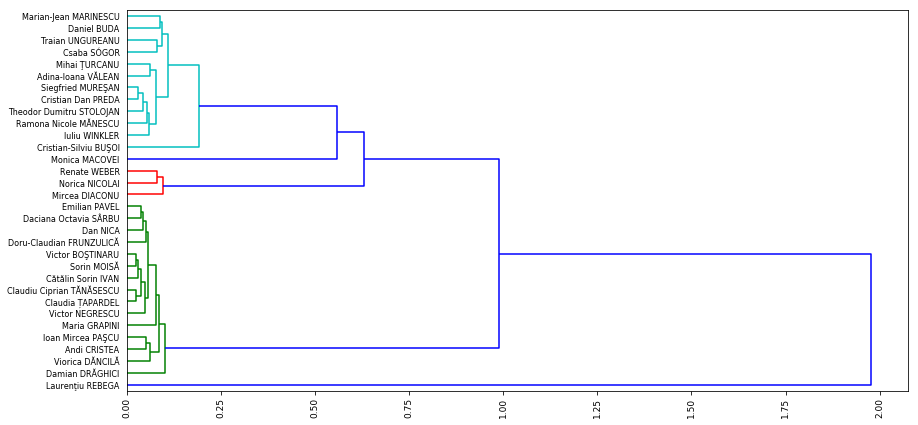

In [276]:
dendro(eu_allegiance_matrix['Romania']['2016']['name']['name'])

Matrix to chord

In [293]:
from scipy import sparse

In [315]:
def matrix_2_chord(matrix,labels):
    row, col = np.where(matrix)
    coo = np.rec.fromarrays([row, col, matrix[row, col]], names='row col value'.split())
    coo = coo.tolist()
    coo_labeled=[[labels[i[0]],labels[i[1]],i[2]] for i in coo if labels[i[0]]!=labels[i[1]]]
    df=pd.DataFrame(coo_labeled)
    return df

In [ ]:
dfs=[]
for country in countries:
    for year in sorted(eu_allegiance_matrix[country]):
        for name1 in sorted(eu_allegiance_matrix[country][year]):
            for name2 in sorted(eu_allegiance_matrix[country][year][name1]):
                try:
                    matrix,labels=dict_2_matrix(eu_allegiance_matrix[country][year][name1][name2],'Same')
                    df=matrix_2_chord(matrix,labels)
                    df['zscore'] = (df[2] - df[2].mean())/df[2].std(ddof=0)
                    df['minmax']=(df[2] - df[2].min()) / (df[2].max() - df[2].min())
                    df=df[df['minmax']>0]
                    df['country']=country
                    df['year']=year
                    df['name1']=name1
                    df['name2']=name2
                    dfs.append(df)
                except: pass
        print(country,year)

Hungary 2004
Hungary 2005
Hungary 2006


In [312]:
dfs=pd.concat(dfs)
dfs.to_excel('ep/export/pandas/eu_allegiance_matrix.xlsx')

In [313]:
dfs

,0,1,2,zscore,minmax,country,year,name1,name2
0,ALDE,PPE,0.736154,0.415976,0.766523,Hungary,2004,group,group
1,ALDE,S&D,0.777525,0.962577,1.000000,Hungary,2004,group,group
2,PPE,ALDE,0.736154,0.415976,0.766523,Hungary,2004,group,group
4,S&D,ALDE,0.777525,0.962577,1.000000,Hungary,2004,group,group
0,Alexandra DOBOLYI,Péter OLAJOS,0.626078,-1.006670,0.280315,Hungary,2004,name,group
1,Alexandra DOBOLYI,Zsolt László BECSEY,0.979062,1.290493,0.968593,Hungary,2004,name,group
2,András GYÜRK,Alexandra DOBOLYI,0.746341,-0.224015,0.514815,Hungary,2004,name,group
3,András GYÜRK,Péter OLAJOS,0.970209,1.232879,0.951331,Hungary,2004,name,group
4,András GYÜRK,Zsolt László BECSEY,0.620233,-1.044706,0.268919,Hungary,2004,name,group
5,Béla GLATTFELDER,Alexandra DOBOLYI,0.720000,-0.395441,0.463452,Hungary,2004,name,group
